In [ ]:
import numpy as np
from keras.preprocessing import image
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
print("Files imported successfully")
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)

Files imported successfully


In [ ]:
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize
import matplotlib.pyplot as plt                   #library to plot graphs
from google.colab import files                    #To be able to upload files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip '/content/drive/MyDrive/self-built.zip'

In [ ]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = ['mask', 'no-mask']

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            img = imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
            img_pred = image.img_to_array(img_pred)
            img_pred = img_pred / 255
            train_img.append(img_pred)

    X = np.array(train_img)

    return X

In [ ]:
X = []
X = load_image_files('/content/zz')
y0 = np.zeros(30)
y1 = np.ones(182)
y = np.concatenate((y0,y1), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))


(212,) (212, 50, 50, 1)


In [ ]:
X_train.shape

(169, 2500)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print(clf.score(X_test,y_test))

0.8837209302325582


In [ ]:
print(clf.predict(X_test[1:2,:]), y_test[1:2])

[1.] [1.]


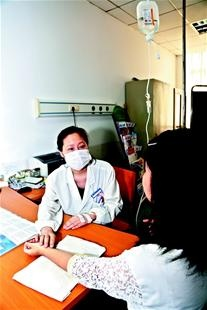



The person is wearing a mask. 



In [ ]:
#here ihad uploaded 10 random no-mask and mask images named i.jpg (i is any integer)
# upload your files as 1.jpg ,2.jpg -----n.jpg  (n files)

from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
img_directory = '/content/zz/mask/0033.jpg'
img = imread(img_directory)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred / 255
img_pred = np.array(img_pred)

img_pred = np.reshape(img_pred,(1,2500))
# train_img.append(img_pred)
prediction = clf.predict(img_pred)
display(Image(img_directory,width= 150, height=150))
print("\n")
if(int(prediction) == 1.):
  print(TGREEN + "The person is wearing a mask. \n")
else:
  print(TRED + "The person is not wearing a mask.\n")